# Lending Club Case Study by Ravi and Hari

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

### Reading & Understanding Lending Case study Data :

In [3]:
loan_pd=pd.read_csv('loan.csv')

C:\Users\212777060\AppData\Local\Temp\ipykernel_52140\3079617002.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_pd=pd.read_csv('loan.csv')


In [4]:
loan_pd.shape

(39717, 111)

In [5]:
loan_pd.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
loan_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loan_pd.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

### Cleansing Data - Null and Missing value Treatment :

In [8]:
# Check for NULL values
loan_pd.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [9]:
# Find columns with more than 80% of NULL values
nan_cols = loan_pd.columns[loan_pd.isnull().sum(axis=0)*100/loan_pd.shape[0] > 80].to_list()
print(nan_cols)
print('\n we have total {} number of columns with 80% NULL data'.format(len(nan_cols)))

['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort'

In [10]:
# Find columns with unique values
one_uniqv_cols=loan_pd.nunique()[loan_pd.nunique()==1].index.to_list()
one_uniqv_cols

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [11]:
# checking null value count in each one_uniqv_cols 
loan_pd.loc[:,one_uniqv_cols].isna().sum()

pymnt_plan                     0
initial_list_status            0
collections_12_mths_ex_med    56
policy_code                    0
application_type               0
acc_now_delinq                 0
chargeoff_within_12_mths      56
delinq_amnt                    0
tax_liens                     39
dtype: int64

In [12]:
# look into collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens
print(loan_pd.collections_12_mths_ex_med.value_counts())
print(loan_pd.chargeoff_within_12_mths.value_counts())
print(loan_pd.tax_liens.value_counts())

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
0.0    39678
Name: tax_liens, dtype: int64


*   clearly we can see there are two value which is 0 and NA, we can also include these column in drop list

In [13]:
# list of columns related to current customer, which will not be available during applicant filing for loan application
    # out_prncp
    # out_prncp_inv
    # delinq_2yrs
    # revol_bal
    # revol_util
    # total_pymnt
    # total_pymnt_inv
    # total_rec_prncp
    # total_rec_int
    # total_rec_late_fee
    # recoveries
    # collection_recovery_fee
    # last_pymnt_d
    # last_pymnt_amnt
    
curr_cus_behav_cols = ['out_prncp', 'out_prncp_inv', 'delinq_2yrs', 'revol_bal', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'issue_d']

In [14]:
# List of some additional unwanted columns for analysis
    # id : customer ID
    # member_id : member ID
    # url : URL is same as lendingclub URL, that's will not impact customers defaulting
    # desc : as purpose gives us consolidated information about description we can drop that column
    # title : title also summarizes in purpose, so removing that
    # emp_title : employee title may not impact his payement schedules
extra_drop_cols = ['desc', 'title', 'emp_title']

In [15]:
# check dataset contains multiple rows of any member id
print(loan_pd.member_id.value_counts()[loan_pd.member_id.value_counts()>1])
print(loan_pd.id.value_counts()[loan_pd.id.value_counts()>1])

Series([], Name: member_id, dtype: int64)
Series([], Name: id, dtype: int64)


no multiple records present for any particular member id, so dropping those two column

In [16]:
# Adding id and member_id columns to drop columns list
extra_drop_cols.append("member_id")
extra_drop_cols.append("id")

In [17]:
# checking url, checking host name & its number of count
from urllib.parse import urlparse
def extract_host(url) :
  parsed_uri = urlparse(url)
  result = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
  return result
print(loan_pd.url.map(lambda x : extract_host(x)).value_counts())

https://lendingclub.com/    39717
Name: url, dtype: int64


url is unique for all rows we can drop that column too

In [18]:
# Adding url col to drop col
extra_drop_cols.append('url')

In [19]:
# concatenate list of columns to drop
drop_cols = nan_cols+one_uniqv_cols+curr_cus_behav_cols+extra_drop_cols

# Number of columns in each list
print('All null rows cols count ',len(nan_cols))
print('All rows having single value cols count ',len(one_uniqv_cols))
print('Current customer behavioral cols count', len(curr_cus_behav_cols))
print('non useful column need to delete ',len(extra_drop_cols))
print('dropping column count ',len(drop_cols))

All null rows cols count  56
All rows having single value cols count  9
Current customer behavioral cols count 15
non useful column need to delete  6
dropping column count  86


In [20]:
# Drop all listed unwanted columns
loan_pd.drop(drop_cols,axis=1,inplace=True)

Remove Current Loan paying customers as analysis is required for customers before giving loan
current customers are not added in that analysis

In [21]:
# Drop Current loan paying customers Rows based on loan_status
loan_pd = loan_pd[loan_pd.loan_status!='Current'].reset_index(drop=True)

##### Final data for EDA after dropping columns and rows

In [22]:
loan_pd.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,Jan-85,1,NaN,3,0,9,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,Apr-99,5,NaN,3,0,4,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,Nov-01,2,NaN,2,0,10,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,Feb-96,1,35.0,10,0,37,Apr-16,0.0
4,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,852xx,AZ,11.20,Nov-04,3,NaN,9,0,12,Jan-16,0.0


In [23]:
# shape of final dataset for analysis
loan_pd.shape

(38577, 25)

In [24]:
loan_pd.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'total_acc',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

# EDA

### Driver variables which would help to analyze if the customer can be a defaulter

#### 1. loan_amnt/funded_amnt/funded_amnt_inv : 
        If the customer is requestion a higher loan amount we need to understand his purpose and other things as higher the loan amount the risk would be higher to be a defaulter
#### 2. term :
        Term period customer trying to repay the loan could be driving factor, if customer taking huge loan and trying to close it in short term that could be a defaulter, need analysis in that variable
#### 3. grade :
        We can derive some data as which graded customers are being highly defaulters, grades are given for a reason right.
#### 4. home_ownership :
        The place customer stays could lead him as defaulter, like if the customer is not having own house tracking them for repayment could be difficult, so they could become defaulter.
#### 5. annual_inc :
        customer with less income and high loans could become a defaulter.
#### 6. verification_status : 
        This is something same reason as home ownership, if the customer is not verified that would be difficult to track for repayments and could become a defaulter.
#### 7. purpose :
        Purpose of the loan could give us information as if the customer is trying to manage his expenses or spending for luxury, with that we could analyze the behaviour of defaulter
#### 8. zip_code/addr_state :
        with these we could analyze the behaviour based on living region
#### 9. dti :
        Debt to Income Ratio is another highly informative parameter, which would tell us customers current financial status and the behaviour to be a defaulter.
#### 10. pub_rec :
        This would give us the general behaviour of the customer if the customer is having any derogatory issues in public
#### 11. pub_rec_bankruptcies :
        This variable helps us to analyze the behaviour of the defaulter as he might be having banckrupticies before
            

## Univariate Analysis :

### Unordered Categorical Variable Analysis :

unordered categorcal variable are : 
1. loan status,
2. home_ownership,
3. verification_status,
4. purpose,
5. addr_state

since order does not matter in these type of categorical variable. Here, important point we can deduct how many number of different categorical value cover how much percetage of datasets.

##### Columns : loan status, home_ownership,verification_status 

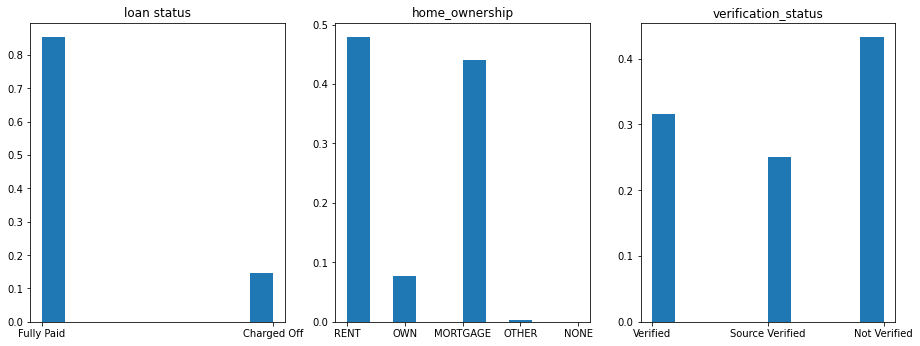

In [25]:
from matplotlib.ticker import PercentFormatter
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
fig,ax = plt.subplots(ncols=3,sharey=False,)
rows=loan_pd.shape[0]
ax[0].hist(loan_pd.loan_status,weights=np.ones(rows) /rows)
#loan_st.set_label("loan status")
ax[0].set_title("loan status")
ax[1].hist(loan_pd.home_ownership,weights=np.ones(rows) /rows)
#loan_st.set_label("loan status")
ax[1].set_title("home_ownership")

ax[2].hist(loan_pd.verification_status,weights=np.ones(rows) /rows)
ax[2].set_title("verification_status")
#loan_st.set_label("loan status")
fig.set_size_inches(15.5,5.5,forward=True)



1.   By viewing histogram loan status, there are more than 80% percentage records belong to fully paid. we have few data points with defult loan.
2.   By looking at Home_owership column histogram, Most loan applicant belong to people who lives in rented house. less than 10% people apply for loan who has own house.
3. By looking histogram of verification status, most people lies in 'not verified' status. 



##### Column : Purpose 

C:\Users\212777060\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

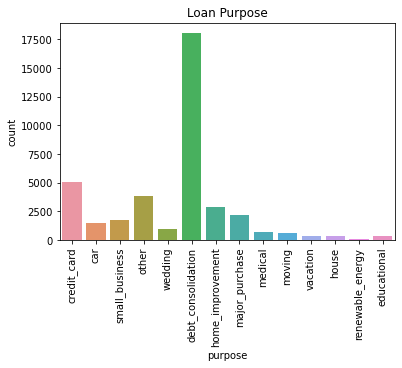

In [26]:
# looking at purpose column
purpose_hist=sns.countplot(loan_pd.purpose)
purpose_hist.set_title('Loan Purpose')
plt.xticks(rotation = 90)


By looking at histogram of purpose column, main purpose of loan is debt consolidation. 



In [27]:
# general common function
def get_cnt_cumsum_dataframe(df,col_nm) :
  val_cnt = df[col_nm].value_counts()
  val_cnt_pd=pd.DataFrame({col_nm:val_cnt.index,'count':val_cnt[:]})
  val_cnt_pd['per_beloging']=val_cnt_pd['count'].apply(lambda x : 100.0*x/df.shape[0])
  val_cnt_pd['cum_belonging']=val_cnt_pd['per_beloging'].cumsum()
  return val_cnt_pd

##### Column : addr_state

Text(0.5, 1.0, 'state')

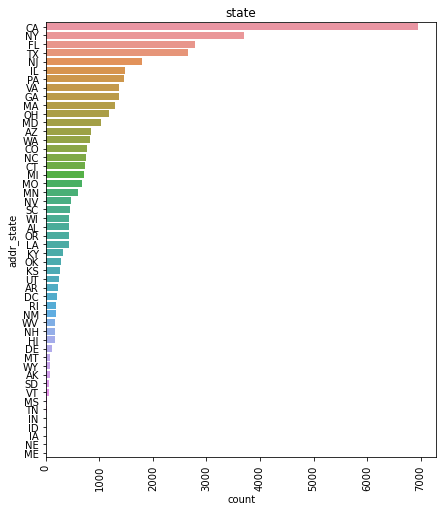

In [28]:
# looking at addr status column
plt.figure(figsize=(7,8))
plt.xticks(rotation = 90)
add_stat_cnt = loan_pd.addr_state.value_counts()
addr_state_hist=sns.countplot(data=loan_pd,y='addr_state',
                              order=add_stat_cnt.index,
                              )
addr_state_hist.set_title('state')

In [29]:
## find out cumulative most state applicants 
state_cnt_pd = get_cnt_cumsum_dataframe(loan_pd,'addr_state')
state_cnt_pd.head(50)

,addr_state,count,per_beloging,cum_belonging
CA,CA,6949,18.013324,18.013324
NY,NY,3698,9.586023,27.599347
FL,FL,2781,7.208959,34.808305
TX,TX,2659,6.892708,41.701014
NJ,NJ,1790,4.640071,46.341084
IL,IL,1478,3.831298,50.172383
PA,PA,1468,3.805376,53.977759
VA,VA,1369,3.548747,57.526505
GA,GA,1359,3.522824,61.049330
MA,MA,1297,3.362107,64.411437


In [30]:
print("50% loan application belong to number of state ",len(state_cnt_pd[state_cnt_pd.cum_belonging<51.0]))
print("80% loan application belong to number of state ",len(state_cnt_pd[state_cnt_pd.cum_belonging<81.0]))

50% loan application belong to number of state  6
80% loan application belong to number of state  17




1.   after looing at histogram , lot of applicant belongs to ca state.
2.   after calculating cumlative sum of each state, we found out that 50% loan application belong to top 6 state out of 50 state.Name of top 6 states are the CA,NY,FL,TX,NJ,IL and 80% loan applications belong to 17 states.



##### Column : Zip_code

Text(0.5, 1.0, 'Zip code')

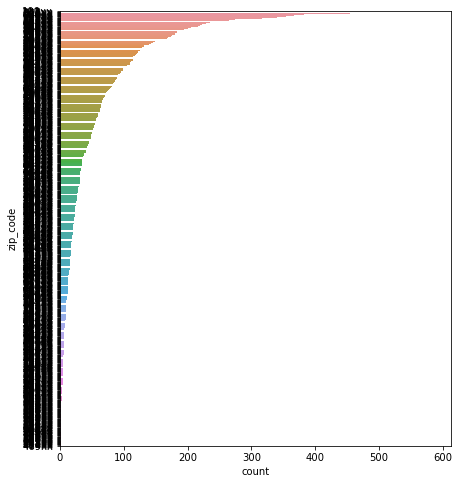

In [31]:
# looking at purpose column
plt.figure(figsize=(7,8))
zip_cnt = loan_pd.zip_code.value_counts()
zip_hist=sns.countplot(data=loan_pd,y='zip_code',
                              order=zip_cnt.index,
                              )
addr_state_hist.set_title('Zip code')

There are lot descret value in zip code. then tick value getting overlap with each other


In [32]:
## find out cumulative most zip code
zip_cnt_pd = get_cnt_cumsum_dataframe(loan_pd,'zip_code')
zip_cnt_pd.head(20)

,zip_code,count,per_beloging,cum_belonging
100xx,100xx,583,1.511263,1.511263
945xx,945xx,531,1.376468,2.887731
112xx,112xx,502,1.301294,4.189025
606xx,606xx,493,1.277964,5.466988
070xx,070xx,455,1.179459,6.646447
900xx,900xx,446,1.156129,7.802577
021xx,021xx,383,0.992820,8.795396
300xx,300xx,383,0.992820,9.788216
926xx,926xx,366,0.948752,10.736968
750xx,750xx,356,0.922830,11.659797


In [33]:
print(zip_cnt_pd.shape)
print("50% loan application belong to number of zip ",len(zip_cnt_pd[zip_cnt_pd.cum_belonging<51.0]))
print("80% loan application belong to number of zip ",len(zip_cnt_pd[zip_cnt_pd.cum_belonging<81.0]))

(822, 4)
50% loan application belong to number of zip  97
80% loan application belong to number of zip  270




1. There are total 822 unique value in zip code column
2. after calculating cum count sum, 50% loan applications belong to 100 number of zip codes out of 822.



### Ordered Categorical Variable Analysis :

ater looking dataset , below are the ordered categorical variables :

1. term
2. grade,sub_grade
3. open_acc
4. emp_length



##### Column : term,emp_length,open_acc

In [34]:
# convert grade into categorical ordered type
loan_pd['grade']=pd.Categorical(loan_pd['grade'], ['A','B','C','D','E','F','G'])

In [35]:
# only keeping numeric value in  emp lenth
# assuming 10 meaning 10+years
import re
#we took negative -1 whoever did not mentioned their employement term.
print(loan_pd.emp_length.head(5))
def extract_numeric_val(st) :
  val=re.findall(r'\d+', str(st))
  return val[0] if len(val)>0 else -1
loan_pd['emp_length'] = loan_pd.emp_length.apply(extract_numeric_val).astype('int')

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4      3 years
Name: emp_length, dtype: object


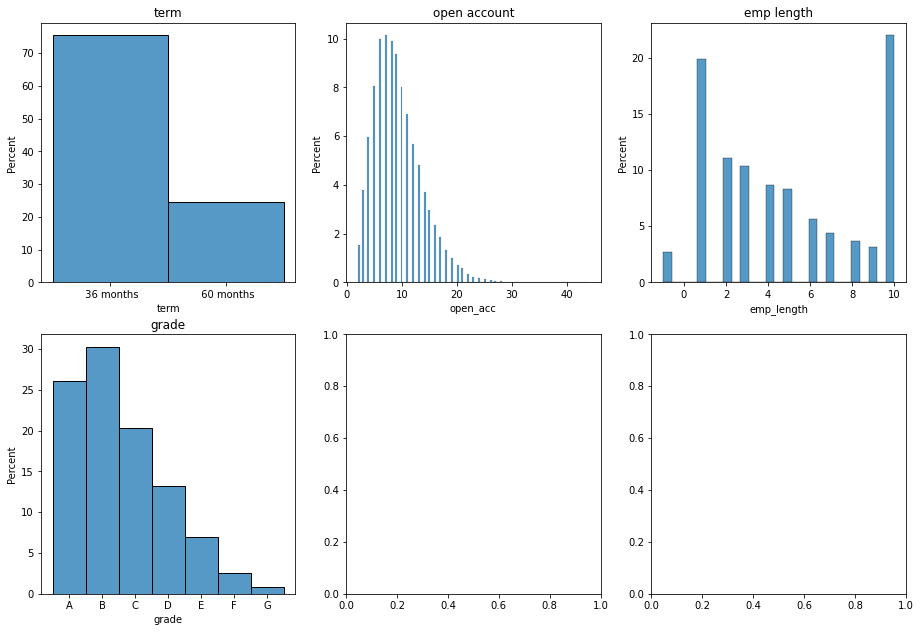

In [36]:
from matplotlib.ticker import PercentFormatter
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
fig,ax = plt.subplots(nrows=2,ncols=3,sharey=False)

sns.histplot(loan_pd.term,ax=ax[0][0],stat='percent')
ax[0][0].set_title("term")

sns.histplot(loan_pd.open_acc,ax=ax[0][1],stat='percent')
ax[0][1].set_title("open account")

sns.histplot(loan_pd.emp_length,ax=ax[0][2],stat='percent')
ax[0][2].set_title("emp length")

sns.histplot(loan_pd.grade,ax=ax[1][0],stat='percent')
ax[1][0].set_title("grade")

fig.set_size_inches(15.5,10.5,forward=True)

observation :

*   after anyalysing of histogram of emp_length, we obeserve as employement term increases, they are less likeyly to apply loan application.

*   We can notice at spike at 10, it because this bucket range is very large. It means people who are employed in greater than 10 year , are being categorize as 10+ year.

*   we took negative -1 whoever did not mentioned their employement term.

*   As we can view on Open Account Histogram, Initially people open account increases, loan application increase, But after reaching at maxiumn point around 9,frquency of loan applications start decreases on higer size.

*   From Grade categorical histogram, loan applications follow negatives trends as grade increase from A to G.



##### Column : grade , subgrade :

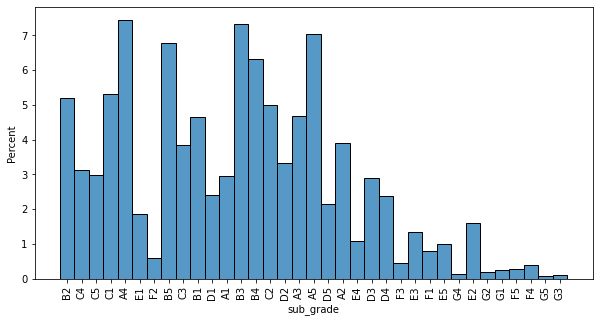

In [37]:
plt.figure(figsize = (10,5))
ax = sns.histplot(loan_pd.sub_grade,stat='percent')
ax.tick_params(axis='x', rotation=90)

obeservation : 
*   Low number of loan applications get filed in Jan month, increase as it reaches towards end of financial year. I think In Us bank likely to close maximum application before finacial year. 



In [38]:
loan_pd.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,Jan-85,1,NaN,3,0,9,May-16,0.0


### Numeric Continuous Variable Analysis :

below important columns are the numeric continuous :
1.   loan_amnt
2.   funded_amnt
3.   funded_amnt_inv
4.   int_rate_in_percentage
5.   installment
6.   annual_inc
7.   dti



In [39]:
# removing percentage keyword from int_rate value
loan_pd['int_rate'] = loan_pd.int_rate.str.rstrip('%').astype('float64')

C:\Users\212777060\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\212777060\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\212777060\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

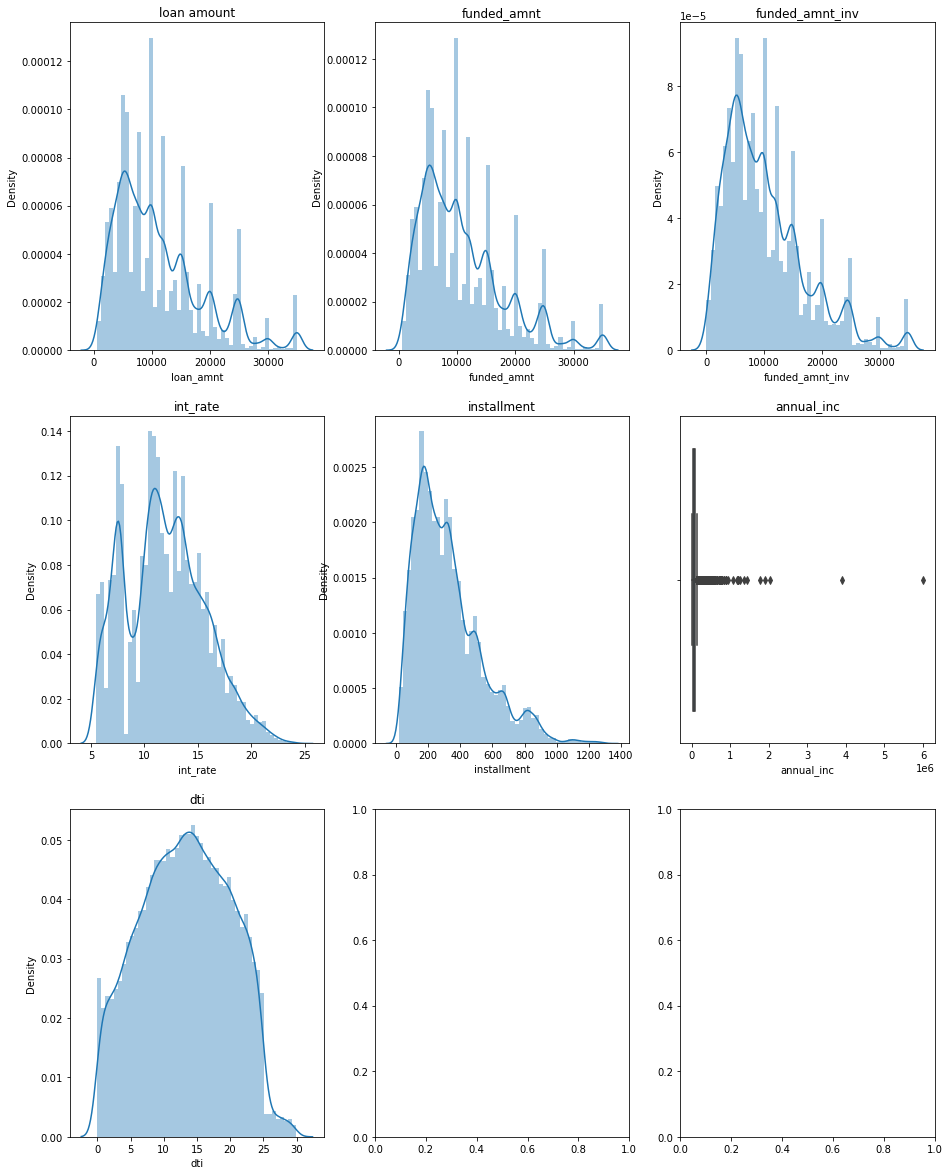

In [40]:
fig,ax = plt.subplots(nrows=3,ncols=3,sharey=False)

sns.distplot(loan_pd.loan_amnt,ax=ax[0][0])
ax[0][0].set_title("loan amount")

sns.distplot(loan_pd.funded_amnt,ax=ax[0][1])
ax[0][1].set_title("funded_amnt")

sns.distplot(loan_pd.funded_amnt_inv,ax=ax[0][2])
ax[0][2].set_title("funded_amnt_inv")

sns.distplot(loan_pd.int_rate,ax=ax[1][0])
ax[1][0].set_title("int_rate")

sns.distplot(loan_pd.installment,ax=ax[1][1])
ax[1][1].set_title("installment")

sns.boxplot(loan_pd.annual_inc,ax=ax[1][2])
ax[1][2].set_title("annual_inc")

sns.distplot(loan_pd.dti,ax=ax[2][0])
ax[2][0].set_title("dti")

fig.set_size_inches(15.5,20.5,forward=True)

## Bivariate Analysis :

We will keep bivarate analysis with below variable after analysis univariate analysis and importance of their feature

1. loan_amnt,funded_amnt,funded_amnt_inv,
2. int_rate
3. installment
4. annual_inc
5. loan_status
6. dti

In [41]:
# convert loan_amount,funded_amount,funded_amount_inv,annual_inc,revol_bal into K
loan_pd['loan_amnt_in_k']=loan_pd.loan_amnt.apply(lambda x : 1.0*x/1000)
loan_pd['annual_inc_in_k']=loan_pd.annual_inc.apply(lambda x : 1.0*x/1000)

#### Categorical-Countinuous Analysis :

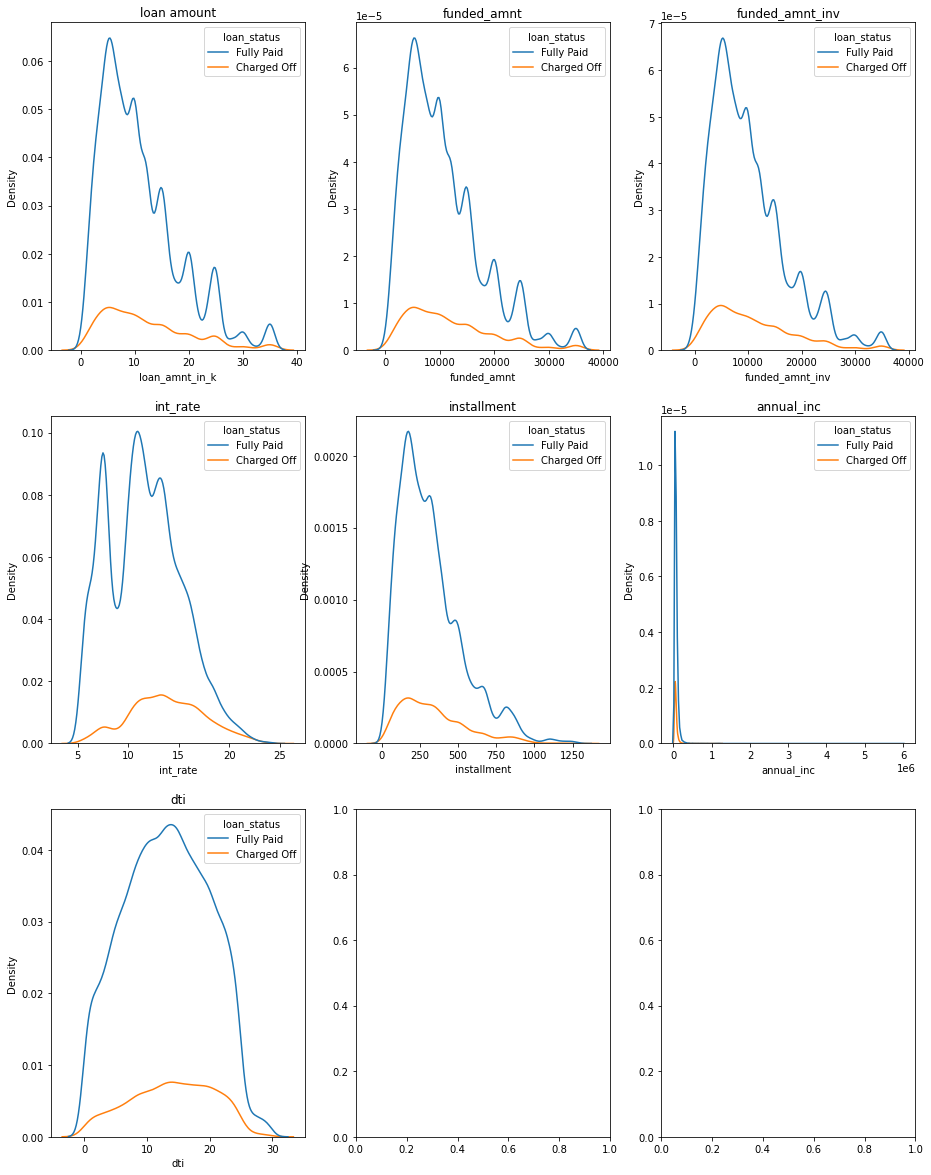

In [42]:
fig,ax = plt.subplots(nrows=3,ncols=3,sharey=False)

sns.kdeplot(data=loan_pd,x='loan_amnt_in_k',hue='loan_status',ax=ax[0][0])
ax[0][0].set_title("loan amount")

sns.kdeplot(data=loan_pd,x='funded_amnt',hue='loan_status',ax=ax[0][1])
ax[0][1].set_title("funded_amnt")

sns.kdeplot(data=loan_pd,x="funded_amnt_inv",hue='loan_status',ax=ax[0][2])
ax[0][2].set_title("funded_amnt_inv")

sns.kdeplot(data=loan_pd,x='int_rate',hue='loan_status',ax=ax[1][0])
ax[1][0].set_title("int_rate")

sns.kdeplot(data=loan_pd,x='installment',hue='loan_status',ax=ax[1][1])
ax[1][1].set_title("installment")

sns.kdeplot(data=loan_pd,x='annual_inc',hue='loan_status',ax=ax[1][2])
ax[1][2].set_title("annual_inc")

sns.kdeplot(data=loan_pd,x='dti',hue='loan_status',ax=ax[2][0])
ax[2][0].set_title("dti")

fig.set_size_inches(15.5,20.5,forward=True)

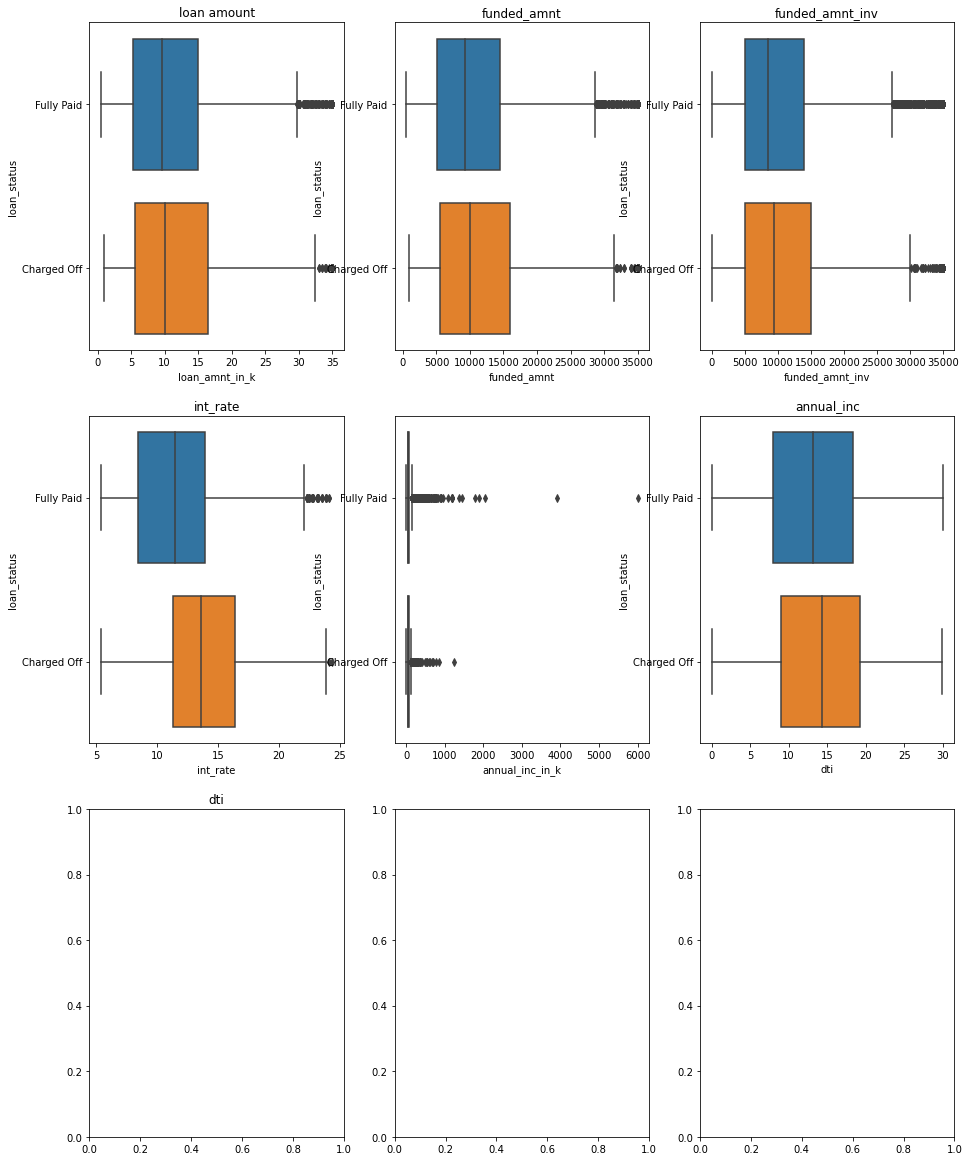

In [43]:
fig,ax = plt.subplots(nrows=3,ncols=3,sharey=False)

sns.boxplot(data=loan_pd,x='loan_amnt_in_k',y='loan_status',ax=ax[0][0])
ax[0][0].set_title("loan amount")

sns.boxplot(data=loan_pd,x='funded_amnt',y='loan_status',ax=ax[0][1])
ax[0][1].set_title("funded_amnt")

sns.boxplot(data=loan_pd,x="funded_amnt_inv",y='loan_status',ax=ax[0][2])
ax[0][2].set_title("funded_amnt_inv")

sns.boxplot(data=loan_pd,x='int_rate',y='loan_status',ax=ax[1][0])
ax[1][0].set_title("int_rate")

sns.boxplot(data=loan_pd,x='annual_inc_in_k',y='loan_status',ax=ax[1][1])
ax[1][2].set_title("annual_inc")

sns.boxplot(data=loan_pd,x='dti',y='loan_status',ax=ax[1][2])
ax[2][0].set_title("dti")


fig.set_size_inches(15.5,20.5,forward=True)


In [44]:
def outlier_val_func(x,q1,q3,iqr) :
  if x > q3+1.5*iqr :
    return q3+0.99*iqr
  elif x < q1-1.5*iqr :
    return  q1-0.99*iqr
  else :
    return x

In [45]:
## look into annual_inc which are greate than 
print('{} mean annual income, {} median annual income '.format(loan_pd.annual_inc.mean(),loan_pd.annual_inc.median()))
# it is not wise to remove outlier, what if these guys have actual salary
# replacing higher value with q3+0.99IQR and q1-0.99IQR
def outlier_rplc(df,func_rplc) :
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  iqr=q3-q1
  return df.apply(lambda x : func_rplc(x,q1,q3,iqr))
loan_pd['annual_inc_remove_outlier']=outlier_rplc(loan_pd.annual_inc,outlier_val_func)
loan_pd['installment_after_outlier']=outlier_rplc(loan_pd.installment,outlier_val_func)
loan_pd['loan_amnt_after_outlier']=outlier_rplc(loan_pd.loan_amnt,outlier_val_func)
loan_pd['funded_amnt_after_outlier']=outlier_rplc(loan_pd.funded_amnt,outlier_val_func)
loan_pd['funded_amnt_inv_after_outlier']=outlier_rplc(loan_pd.funded_amnt_inv,outlier_val_func)
loan_pd['int_rate_in_percentage_after_outlier']=outlier_rplc(loan_pd.int_rate,outlier_val_func)

68777.97368120909 mean annual income, 58868.0 median annual income 


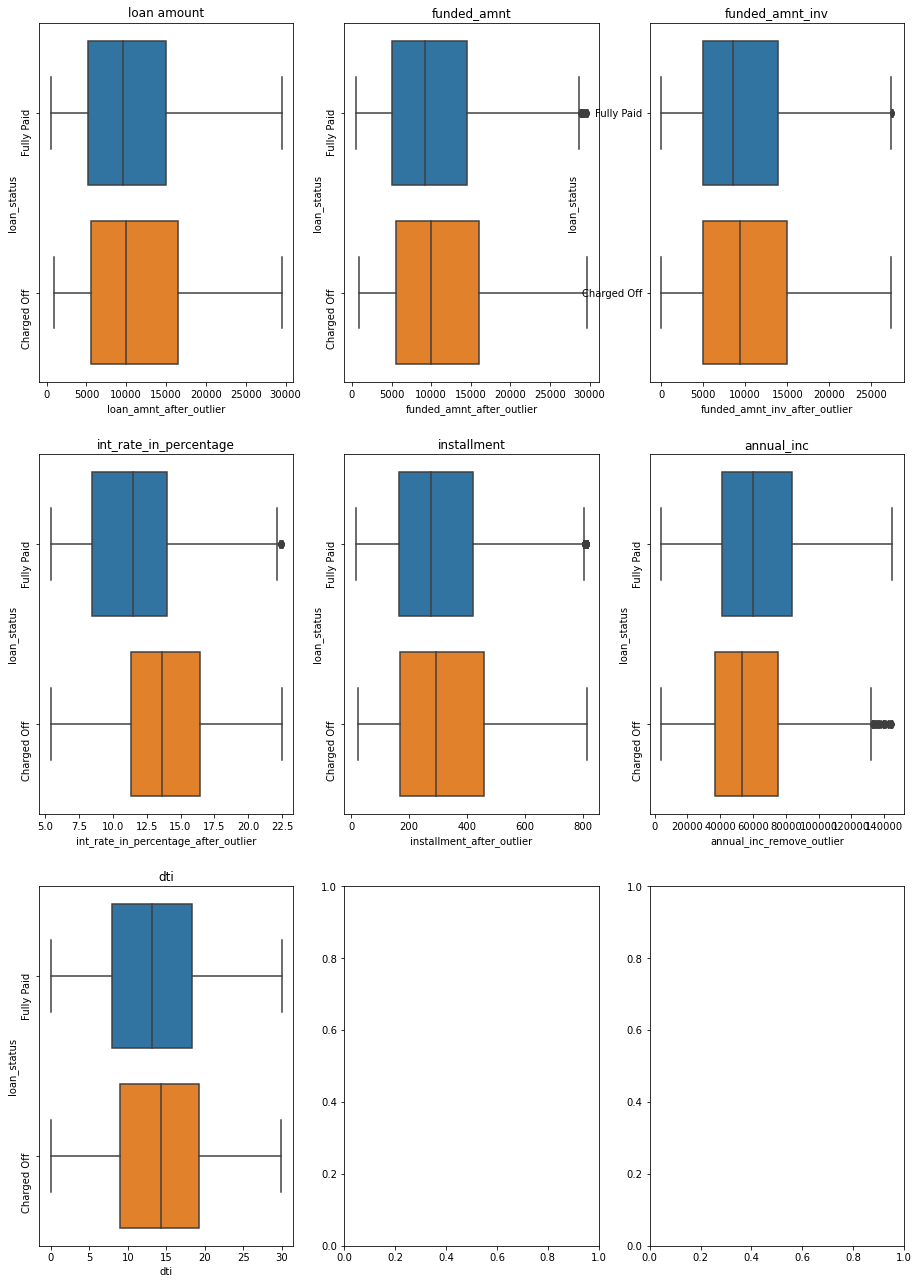

In [46]:
# after removing outlier

fig,ax = plt.subplots(nrows=3,ncols=3,sharey=False)

sns.boxplot(data=loan_pd,x='loan_amnt_after_outlier',y='loan_status',ax=ax[0][0])
ax[0][0].set_title("loan amount")
ax[0][0].tick_params(axis='y', rotation=90)

sns.boxplot(data=loan_pd,x='funded_amnt_after_outlier',y='loan_status',ax=ax[0][1])
ax[0][1].set_title("funded_amnt")
ax[0][1].tick_params(axis='y', rotation=90)

sns.boxplot(data=loan_pd,x="funded_amnt_inv_after_outlier",y='loan_status',ax=ax[0][2])
ax[0][2].set_title("funded_amnt_inv")

sns.boxplot(data=loan_pd,x='int_rate_in_percentage_after_outlier',y='loan_status',ax=ax[1][0])
ax[1][0].set_title("int_rate_in_percentage")
ax[1][0].tick_params(axis='y', rotation=90)

sns.boxplot(data=loan_pd,x='installment_after_outlier',y='loan_status',ax=ax[1][1])
ax[1][1].set_title("installment")
ax[1][1].tick_params(axis='y', rotation=90)

sns.boxplot(data=loan_pd,x='annual_inc_remove_outlier',y='loan_status',ax=ax[1][2])
ax[1][2].set_title("annual_inc")
ax[1][2].tick_params(axis='y', rotation=90)

sns.boxplot(data=loan_pd,x='dti',y='loan_status',ax=ax[2][0])
ax[2][0].set_title("dti")
ax[2][0].tick_params(axis='y', rotation=90)

fig.set_size_inches(15.5,22.5,forward=True)


observation :

*   It is visible from loan amount box plot, iqr is bigger for charged off loans
*   higher intrest rate loan is more likely to end up with charged off.
*   higher intrest rate loan is more likely to end up with charged off.
*   From Box plot of annual income, Q3 value of charged off loan is lower than fully paid loan. It means good income persons are more likely to close loan as fully paid.
*   From Box plot of Debt to income ratio, q1, median, and q3 having larger value in charged off loan. higher debt to income ratio is not good. 





# Multivariate Analysis :

Final Variable listed for multivariate analysis :

1. addr_state vs verification_status with loan_status
2. emp length vs loan_status
3. employee length,home_ownership vs loan_status
4. employee income,home_ownership vs loan_status
5. Installment vs home_ownership against loan_status
6. dti vs pub_rec_bankruptcies variable against loan_status
7. dti vs purpose variable against loan status

##### addr_state vs varification status with loan_status

In [48]:
## converting source verified and verified with one category variable
# converting source verified into only verified 
loan_pd['verification_status_two_value']=loan_pd.verification_status.apply(
    lambda x : 'Verified' if x=='Source Verified' else x)


In [49]:
## checking top state loan which cover 80% loan
loan_addr_state = get_cnt_cumsum_dataframe(loan_pd,'addr_state')
most_loan_applicant_state=loan_addr_state[loan_addr_state['cum_belonging']<81].index
#loan_pd[]
most_loan_applicant_state

Index(['CA', 'NY', 'FL', 'TX', 'NJ', 'IL', 'PA', 'VA', 'GA', 'MA', 'OH', 'MD',
       'AZ', 'WA', 'CO', 'NC', 'CT'],
      dtype='object')

<AxesSubplot:xlabel='addr_state'>

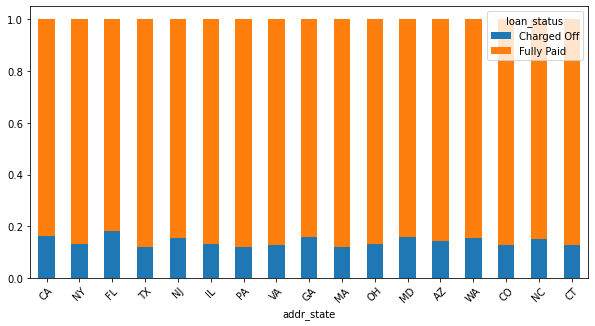

In [50]:
#from pandas.core import aggregation
# taking annual_inc,
state_wise=pd.pivot_table(data=loan_pd,
                          #values='',
                          index='addr_state',
                          columns=['loan_status'],
                          aggfunc='count')

state_wise_per = state_wise['annual_inc'].loc[:,['Charged Off','Fully Paid']
                                          ].apply(lambda x : x/x.sum(),axis=1)
state_wise_per=state_wise_per.loc[most_loan_applicant_state.to_list(),:]
state_wise_per.plot(kind='bar',stacked=True, rot=45,figsize=(10,5))

<AxesSubplot:xlabel='state'>

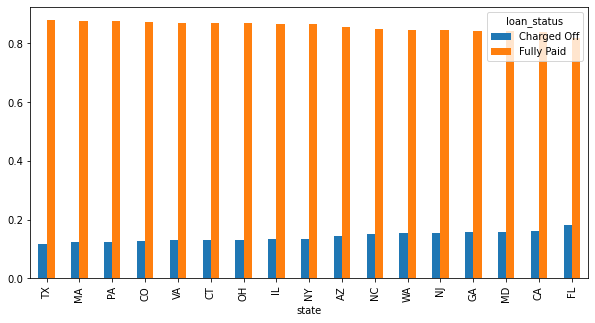

In [51]:
state_wise_per['state'] = state_wise_per.index
state_wise_per.sort_values('Charged Off').plot(x='state',y=['Charged Off','Fully Paid'], 
                                              kind="bar",figsize=(10,5))


Observation : 
*   FL state provide most default loan and most fully paid loans are from TX state.



In [52]:
'''
state_wise=pd.pivot_table(data=loan_pd,
                          #values='',
                          index='addr_state',
                          columns=['loan_status','verification_status_two_value'],
                          aggfunc='count')

state_wise_per = state_wise['annual_inc'].loc[:,[('Charged Off','Not Verified'),
                                         
                                          ('Charged Off','Verified'),
                                          ('Fully Paid','Not Verified'),
                                        
                                          ('Fully Paid','Verified')]
                                          ].apply(lambda x : x/x.sum(),axis=1)
state_wise_per=state_wise_per.loc[most_loan_applicant_state.to_list(),:]
state_wise_per.plot(kind='bar',stacked=True, rot=45,figsize=(10,5))
'''

"\nstate_wise=pd.pivot_table(data=loan_pd,\n                          #values='',\n                          index='addr_state',\n                          columns=['loan_status','verification_status_two_value'],\n                          aggfunc='count')\n\nstate_wise_per = state_wise['annual_inc'].loc[:,[('Charged Off','Not Verified'),\n                                         \n                                          ('Charged Off','Verified'),\n                                          ('Fully Paid','Not Verified'),\n                                        \n                                          ('Fully Paid','Verified')]\n                                          ].apply(lambda x : x/x.sum(),axis=1)\nstate_wise_per=state_wise_per.loc[most_loan_applicant_state.to_list(),:]\nstate_wise_per.plot(kind='bar',stacked=True, rot=45,figsize=(10,5))\n"

In [53]:
state_wise_per

loan_status,Charged Off,Fully Paid,state
addr_state,,,
CA,0.161894,0.838106,CA
NY,0.133856,0.866144,NY
FL,0.181230,0.818770,FL
TX,0.118842,0.881158,TX
NJ,0.155307,0.844693,NJ
IL,0.133288,0.866712,IL
PA,0.122616,0.877384,PA
VA,0.129291,0.870709,VA
GA,0.158205,0.841795,GA


<AxesSubplot:ylabel='addr_state,verification_status_two_value'>

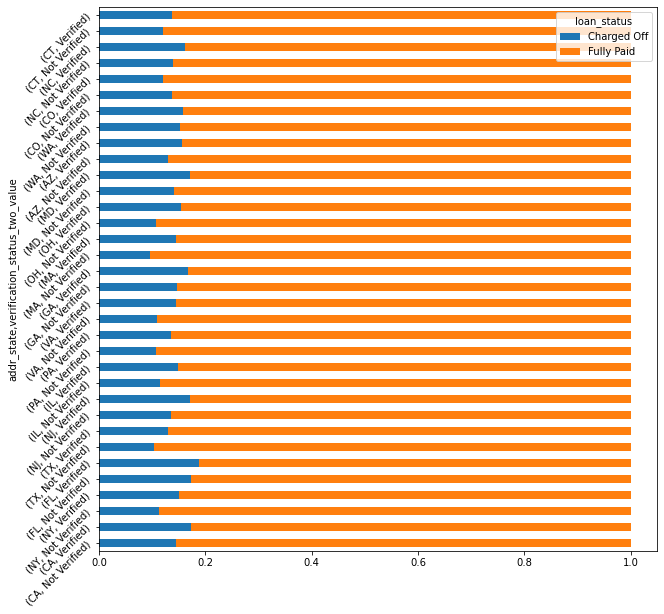

In [54]:
# taking annual_inc,
state_wise=pd.pivot_table(data=loan_pd,
                          values='purpose',
                          index=['addr_state','verification_status_two_value'],
                          columns=['loan_status'],
                          aggfunc='count')

state_wise_per = state_wise.loc[:,['Charged Off','Fully Paid',]].apply(lambda x : x/x.sum(),axis=1)
state_wise_per=state_wise_per.loc[most_loan_applicant_state.to_list(),:]
state_wise_per.plot(kind='barh',stacked=True, rot=45,figsize=(10,10))

obeservation :
1. Verification process is not good because blue line (charged off) for verfication status are bigger than not verified.

##### emp length vs loan_status

In [55]:
## making bin for emp length
def emp_bin_func(x) :
  if x == -1 :
    return 'didnt mentioned'

  elif x>=0 and x<=3 :
    return 'bignner'

  elif x>3 and x<=6 :
    return 'medium'

  elif x>6 and x<=9 :
    return 'medium-high'

  else :
    return 'high'
  
loan_pd['emp_length_bin'] = loan_pd.emp_length.apply(emp_bin_func)
loan_pd['emp_length_bin']=pd.Categorical(loan_pd['emp_length_bin'],
                                         ['didnt mentioned','bignner','medium','medium-high','high'])

loan_pd['emp_len_mentioned']=loan_pd.emp_length.apply(lambda x : '1' if x==-1 else 0)

In [56]:
emp_length_wise = pd.pivot_table(data=loan_pd,values='purpose',
                                index='emp_length_bin',
                               columns=['loan_status'],
                               aggfunc=len)
emp_length_wise

loan_status,Charged Off,Fully Paid
emp_length_bin,,
didnt mentioned,228,805
bignner,2217,13763
medium,1227,7477
medium-high,624,3748
high,1331,7157


loan_status      Charged Off  Fully Paid
emp_length_bin                          
didnt mentioned     0.220716    0.779284
bignner             0.138736    0.861264
medium              0.140970    0.859030
medium-high         0.142726    0.857274
high                0.156810    0.843190


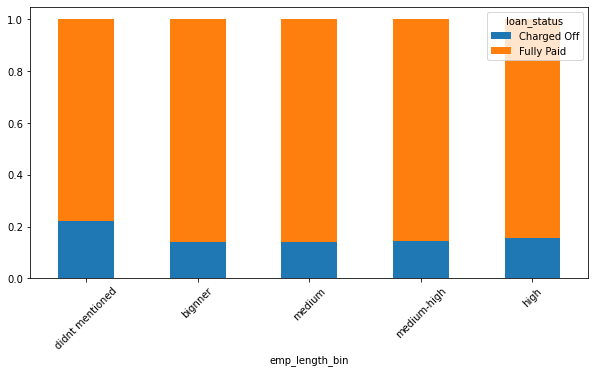

In [57]:
emp_length_wise=pd.pivot_table(data=loan_pd,values='purpose',
                                index='emp_length_bin',
                               columns=['loan_status'],
                               aggfunc=len)
emp_length_wise = emp_length_wise[['Charged Off','Fully Paid']].apply(lambda x : x/x.sum(),axis=1)
emp_length_wise.plot(kind='bar',stacked=True, rot=45,figsize=(10,5))
print(emp_length_wise)

##### employee length,home_ownership vs loan_status

loan_status                     Charged Off  Fully Paid
emp_length_bin  home_ownership                         
didnt mentioned MORTGAGE           0.192488    0.807512
                NONE                    NaN         NaN
                OTHER                   NaN         NaN
                OWN                0.209756    0.790244
                RENT               0.256219    0.743781
bignner         MORTGAGE           0.133462    0.866538
                NONE               0.000000    1.000000
                OTHER              0.196429    0.803571
                OWN                0.149212    0.850788
                RENT               0.140081    0.859919
medium          MORTGAGE           0.130909    0.869091
                NONE               0.000000    1.000000
                OTHER              0.062500    0.937500
                OWN                0.147727    0.852273
                RENT               0.149491    0.850509
medium-high     MORTGAGE           0.130302    0

<AxesSubplot:ylabel='emp_length_bin,home_ownership'>

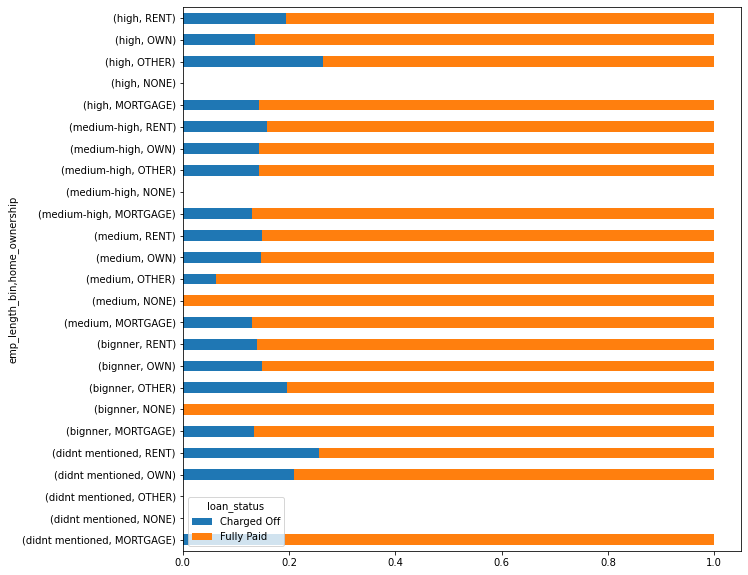

In [58]:
emp_homeowership_status=pd.pivot_table(data=loan_pd,
                          values='purpose',
                          index=['emp_length_bin','home_ownership'],
                          #columns=['emp_length_bin','home_ownership'],
                          columns=['loan_status'],
                          aggfunc='count',fill_value=0)
emp_homeowership_status = emp_homeowership_status[['Charged Off','Fully Paid']].apply(lambda x : x/x.sum(),axis=1)

print(emp_homeowership_status)

emp_homeowership_status.plot(kind='barh',stacked=True,figsize=(10,10))
## not making big difference 

Observation : 
*   loan applications of people who did not mentioned empoyee length with home ownership rent are more risky application. (as visible at blue bar of didnt mentioned vs rent)
*  Beginner employye length with other home ownership and high employement length with other are more risky.




##### employee income,home_ownership vs loan_status

In [59]:
loan_pd['annual_inc_bin']=pd.qcut(loan_pd.annual_inc_remove_outlier,q=5,
            labels=['very low(3999.999, 37196.16]','low(37196.16, 50004.0]',
                    'medium(50004.0, 65004.0]','high(65004.0, 90000.0]',
                    'very high(90000.0, 145000.0]'])

loan_status                   Charged Off  Fully Paid
annual_inc_bin                                       
very low(3999.999, 37196.16]     0.183126    0.816874
low(37196.16, 50004.0]           0.156926    0.843074
medium(50004.0, 65004.0]         0.149629    0.850371
high(65004.0, 90000.0]           0.129651    0.870349
very high(90000.0, 145000.0]     0.109285    0.890715


<AxesSubplot:xlabel='annual_inc_bin'>

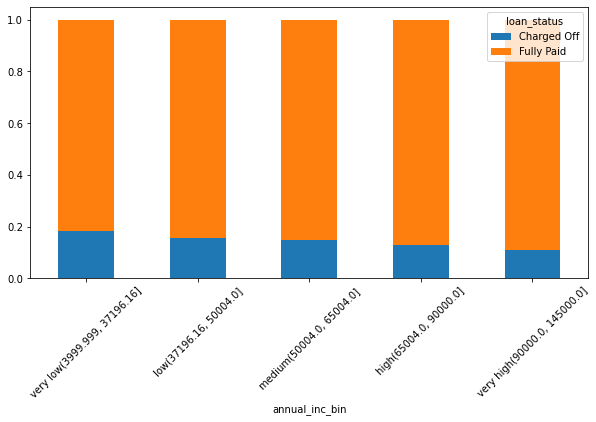

In [60]:
# analysis annual_inc_bin vs loan status
annual_inc_bin_status=pd.pivot_table(data=loan_pd,
                          values='purpose',
                          index=['annual_inc_bin'],
                          #columns=['emp_length_bin','home_ownership'],
                          columns=['loan_status'],
                          aggfunc='count',fill_value=0)
annual_inc_bin_status = annual_inc_bin_status[['Charged Off','Fully Paid']].apply(lambda x : x/x.sum(),axis=1)

print(annual_inc_bin_status)

annual_inc_bin_status.plot(kind='bar',stacked=True, rot=45,figsize=(10,5))

loan_status                                  Charged Off  Fully Paid
annual_inc_bin               home_ownership                         
very low(3999.999, 37196.16] MORTGAGE           0.176862    0.823138
                             NONE               0.000000    1.000000
                             OTHER              0.200000    0.800000
                             OWN                0.171079    0.828921
                             RENT               0.187176    0.812824
low(37196.16, 50004.0]       MORTGAGE           0.157082    0.842918
                             NONE                    NaN         NaN
                             OTHER              0.157895    0.842105
                             OWN                0.155385    0.844615
                             RENT               0.157054    0.842946
medium(50004.0, 65004.0]     MORTGAGE           0.157579    0.842421
                             NONE                    NaN         NaN
                             OTHER

<AxesSubplot:ylabel='annual_inc_bin,home_ownership'>

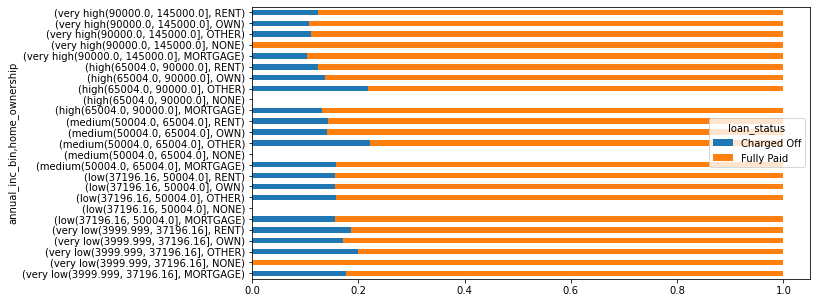

In [61]:
# analysis between annual inc vs home ownership aganist loan status
# analysis annual_inc_bin vs loan status
annual_inc_bin_status=pd.pivot_table(data=loan_pd,
                          values='purpose',
                          index=['annual_inc_bin','home_ownership'],
                          #columns=['emp_length_bin','home_ownership'],
                          columns=['loan_status'],
                          aggfunc='count',fill_value=0)
annual_inc_bin_status = annual_inc_bin_status[['Charged Off','Fully Paid']].apply(lambda x : x/x.sum(),axis=1)

print(annual_inc_bin_status)

annual_inc_bin_status.plot(kind='barh',stacked=True,figsize=(10,5))

 obeservation : 
*   Generally it evident that People with 'other' Home ownership are more risky no matter what they belong to any income category.
*   there is highly chance that loan application of  very low income are going to be defaulter.
*   Similary people with mortage home ownership are likely to complete loan succesfully.



##### Purpose vs loan status

<AxesSubplot:xlabel='purpose'>

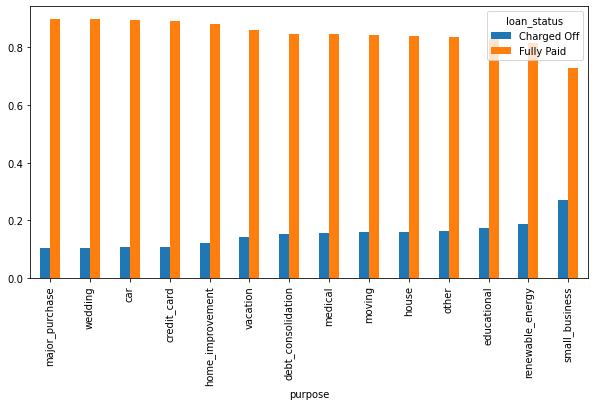

In [62]:
purpose_status=pd.pivot_table(data=loan_pd,
                          values='zip_code',
                          index=['purpose'],
                          #columns=['emp_length_bin','home_ownership'],
                          columns=['loan_status'],
                          aggfunc='count',fill_value=0)
purpose_status = purpose_status[['Charged Off','Fully Paid']].apply(lambda x : x/x.sum(),axis=1)
purpose_status['purpose'] = purpose_status.index
purpose_status.sort_values('Charged Off').plot(x='purpose',y=['Charged Off','Fully Paid'], 
                                              kind="bar",figsize=(10,5))



*   small business loan ended up with default loan.
*   car, debit card, major purchase are the good for loan.



##### Installment vs home_ownership against loan_status

<AxesSubplot:xlabel='emp_length_bin', ylabel='installment_after_outlier'>

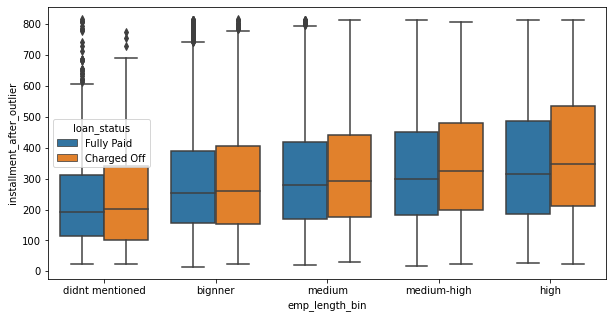

In [63]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_pd, x="emp_length_bin", y="installment_after_outlier", hue="loan_status")

observation :

*  Median of installment of each category of not paying people is higher than paid off peiple.Same thing happend with third quartile. It means people each category with lower installment is more safe.

*  But after looking at Q1 of each category, ther are some who are also not able to make pay lower emi as well.




##### dti vs pub_rec_bankruptcies variable against loan_status

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='dti'>

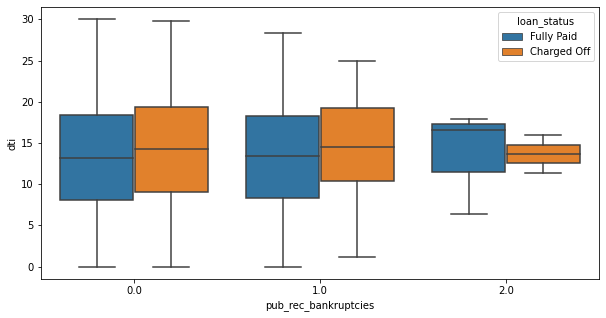

In [64]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_pd, x="pub_rec_bankruptcies", y="dti", hue="loan_status")


Observation : 
*   bigger debt to income ratio and higher number of public bankrupt means more chance to become loan defaulter.
*   But but little deviation toward total 2 bankrupts. It may be because number of loan given to such people is very few.



##### dti vs purpose variable against loan status

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

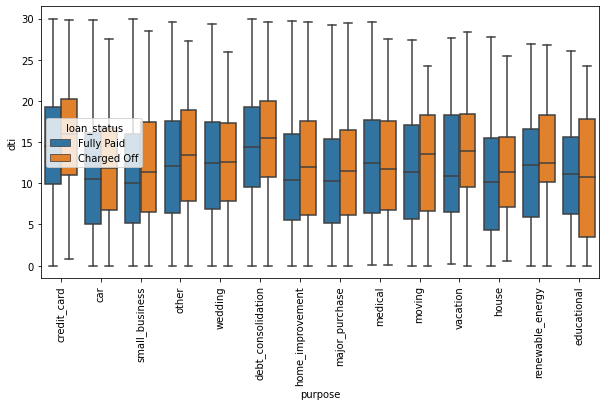

In [65]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_pd, x="purpose", y="dti", hue="loan_status")
plt.xticks(rotation=90)